In [1]:
# import stuff
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
import matplotlib.gridspec as gridspec
import sklearn as sk



%load_ext autoreload
%autoreload 2

%matplotlib inline

In [349]:
# pick session
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging|FreqMorph_Decision|FreqMorph_Timeout'
tracks = 'TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]
df = df[(df['ImagingRegion']=="") | (df['ImagingRegion']=="CA1")]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [519]:
# load session
mouse = '4139265.4'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

MouseName  DateFolder  SessionNumber              Track  RewardCount  \
1371  4139265.4  07_02_2019              2  TwoTower_foraging           60   
1373  4139265.4  07_02_2019              4  TwoTower_foraging           60   
1407  4139265.4  10_02_2019              2  TwoTower_foraging           60   
1436  4139265.4  12_02_2019              2  TwoTower_foraging           85   
1459  4139265.4  15_02_2019              3  TwoTower_foraging           82   
1478  4139265.4  17_02_2019              2  TwoTower_foraging           94   
1489  4139265.4  18_02_2019              2  TwoTower_foraging          101   
1498  4139265.4  19_02_2019              2  TwoTower_foraging           97   
1510  4139265.4  20_02_2019              2  TwoTower_foraging           99   
1516  4139265.4  21_02_2019              2  TwoTower_foraging           97   
1525  4139265.4  22_02_2019              2  TwoTower_foraging           91   

      Imaging ImagingRegion   DateTime  \
1371        1           CA1 2019-02-07   
1373        1           CA1 2019-02-07   
1407        1           CA1 2019-02-10   
1436        1           CA1 2019-02-12   
1459        1           CA1 2019-02-15   
1478        1           CA1 2019-02-17   
1489        1           CA1 2019-02-18   
1498        1           CA1 2019-02-19   
1510        1           CA1 2019-02-20   
1516        1           CA1 2019-02-21   
1525        1           CA1 2019-02-22   

                                              data file scanfile  \
1371  G:\My Drive\VR_Data\TwoTower\4139265.4\07_02_2...     None   
1373  G:\My Drive\VR_Data\TwoTower\4139265.4\07_02_2...     None   
1407  G:\My Drive\VR_Data\TwoTower\4139265.4\10_02_2...     None   
1436  G:\My Drive\VR_Data\TwoTower\4139265.4\12_02_2...     None   
1459  G:\My Drive\VR_Data\TwoTower\4139265.4\15_02_2...     None   
1478  G:\My Drive\VR_Data\TwoTower\4139265.4\17_02_2...     None   
1489  G:\My Drive\VR_Data\TwoTower\4139265.4\18_02_2...     None   
1498  G:\My Drive\VR_Data\TwoTower\4139265.4\19_02_2...     None   
1510  G:\My Drive\VR_Data\TwoTower\4139265.4\20_02_2...     None   
1516  G:\My Drive\VR_Data\TwoTower\4139265.4\21_02_2...     None   
1525  G:\My Drive\VR_Data\TwoTower\4139265.4\22_02_2...     None   

                                                scanmat  \
1371  G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...   
1373  G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...   
1407  G:\My Drive\2P_Data\TwoTower\4139265.4\10_02_2...   
1436  G:\My Drive\2P_Data\TwoTower\4139265.4\12_02_2...   
1459  G:\My Drive\2P_Data\TwoTower\4139265.4\15_02_2...   
1478  G:\My Drive\2P_Data\TwoTower\4139265.4\17_02_2...   
1489  G:\My Drive\2P_Data\TwoTower\4139265.4\18_02_2...   
1498  G:\My Drive\2P_Data\TwoTower\4139265.4\19_02_2...   
1510  G:\My Drive\2P_Data\TwoTower\4139265.4\20_02_2...   
1516  G:\My Drive\2P_Data\TwoTower\4139265.4\21_02_2...   
1525  G:\My Drive\2P_Data\TwoTower\4139265.4\22_02_2...   

                                              s2pfolder  
1371  G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...  
1373  G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...  
1407  G:\My Drive\2P_Data\TwoTower\4139265.4\10_02_2...  
1436  G:\My Drive\2P_Data\TwoTower\4139265.4\12_02_2...  
1459  G:\My Drive\2P_Data\TwoTower\4139265.4\15_02_2...  
1478  G:\My Drive\2P_Data\TwoTower\4139265.4\17_02_2...  
1489  G:\My Drive\2P_Data\TwoTower\4139265.4\18_02_2...  
1498  G:\My Drive\2P_Data\TwoTower\4139265.4\19_02_2...  
1510  G:\My Drive\2P_Data\TwoTower\4139265.4\20_02_2...  
1516  G:\My Drive\2P_Data\TwoTower\4139265.4\21_02_2...  
1525  G:\My Drive\2P_Data\TwoTower\4139265.4\22_02_2...

In [520]:
sess = df_mouse.iloc[-1]

In [521]:
VRDat, C, S, A = pp.load_scan_sess(sess,fneu_coeff=0.7)
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
effMorph = (trial_info['morphs'] +  trial_info['wallJitter'] + trial_info['bckgndJitter'] + .3)/1.6
msort = np.argsort(effMorph)

num aberrant ttls 0.0
32084 (32084,) (32084, 21) 105601


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


In [608]:
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,bin_size=10,speed=VRDat['speed']._values)
print(S_trial_mat.shape)
S_trial_mat[np.isnan(S_trial_mat)]=0.
S_tm_norm = S_trial_mat/np.linalg.norm(S_trial_mat,ord=2,axis=1)[:,np.newaxis,:]
S_tm_norm = S_tm_norm[msort,:,:]
#S_tm_norm = sp.stats.zscore(S_trial_mat,axis=1)

# S_mean_mat = np.zeros([5,S_trial_mat.shape[1],S_trial_mat.shape[2]])
# for i,m in enumerate([0,.25,.5,.75,1]):
#     S_mean_mat[i,:,:]=np.nanmean(S_trial_mat[trial_info['morphs']==m,:,:],axis=0)
S_mean_mat = u.morph_pos_rate_map(S_trial_mat,effMorph)
# S_mean_mat,l = u.across_trial_avg(S_trial_mat,trial_info['morphs'])

S_mean_mat[np.isnan(S_mean_mat)]=0.
S_mean_mat_norm = S_mean_mat/np.linalg.norm(S_mean_mat,ord=2,axis=1)[:,np.newaxis,:]

print(S_mean_mat.shape)


(120, 45, 1631)
(10, 45, 1631)


In [523]:
# calculate single cell trial by trial similarity
ss_sim = np.matmul(np.transpose(S_tm_norm,axes=(2,0,1)),np.transpose(S_tm_norm,axes=(2,1,0)))
# ss_sim=ss_sim[:,msort,:]
# ss_sim=ss_sim[:,:,msort]


mu_sim = np.matmul(np.transpose(S_mean_mat_norm,axes=(2,0,1)),np.transpose(S_mean_mat_norm,axes=(2,1,0)))
print(ss_sim.shape)

(1631, 120, 120)


(array([  0,   0,   0, ..., 117, 117, 118], dtype=int64), array([  1,   2,   3, ..., 118, 119, 119], dtype=int64))
(1631, 7140)


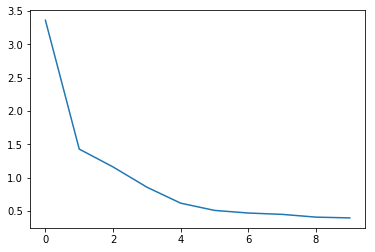

In [524]:
nc = 10
pca = sk.decomposition.PCA(n_components=nc)
ui = np.triu_indices(ss_sim.shape[1],k=1)
print(ui)
ss_flat = ss_sim[:,ui[0],ui[1]]
print(ss_flat.shape)
ss_ = pca.fit_transform(ss_flat)

f,ax = plt.subplots()
ax.plot(pca.explained_variance_[:10])

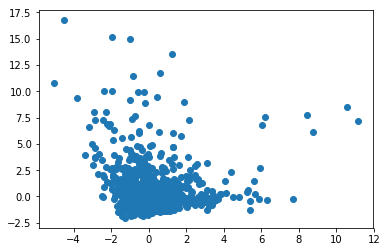

In [525]:
f,ax = plt.subplots()
ax.scatter(ss_[:,1],ss_[:,0])

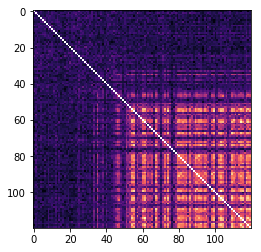

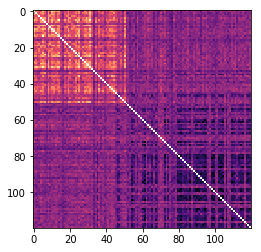

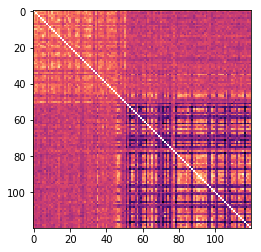

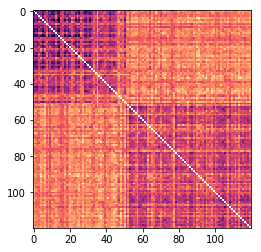

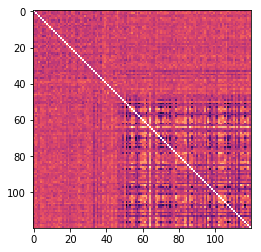

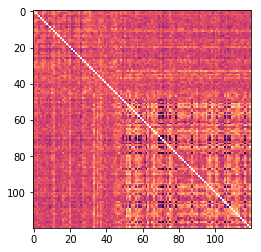

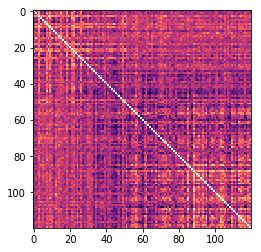

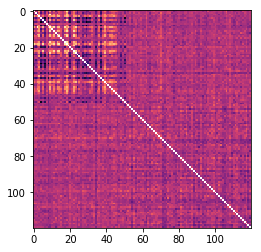

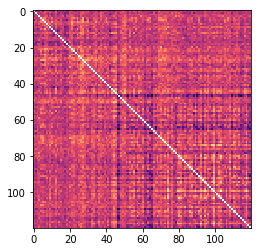

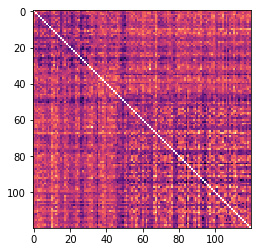

In [526]:
# cluster
H = np.zeros([nc,ss_sim.shape[1],ss_sim.shape[2]])

H[:,ui[0],ui[1]] = pca.components_#.reshape([nc,ss_sim.shape[-1],ss_sim.shape[-1]])
H += np.transpose(H,axes=(0,2,1))
for j in range(ss_.shape[1]):
    f,ax = plt.subplots()
    _H = H[j,:,:]
    
    _H[np.diag_indices_from(_H)]=np.nan
    ax.imshow(_H,cmap='magma')


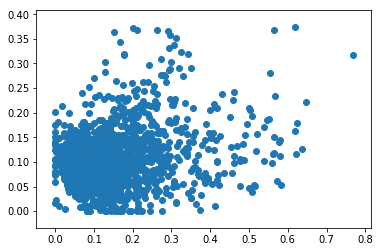

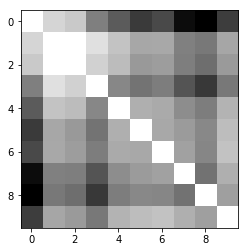

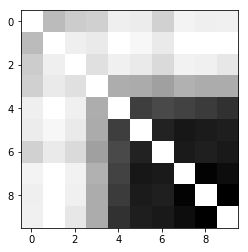

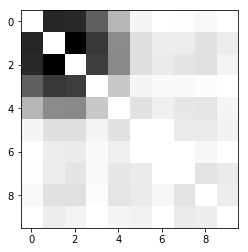

In [436]:
nc = 3
pca = sk.decomposition.NMF(n_components=nc)

ui = np.triu_indices(mu_sim.shape[1],k=1)
mu_flat = mu_sim[:,ui[0],ui[1]]
ss_ = pca.fit_transform(mu_flat)


# ss_ = pca.fit_transform(mu_sim.reshape([mu_sim.shape[0],-1]))


f,ax = plt.subplots()
ax.scatter(ss_[:,1],ss_[:,2])


H = np.zeros([nc,mu_sim.shape[1],mu_sim.shape[2]])

H[:,ui[0],ui[1]] = pca.components_#.reshape([nc,ss_sim.shape[-1],ss_sim.shape[-1]])
H += np.transpose(H,axes=(0,2,1))
for j in range(ss_.shape[1]):
    f,ax = plt.subplots()
    _H = H[j,:,:]
    
    _H[np.diag_indices_from(_H)]=np.nan
    ax.imshow(_H,cmap='Greys')


In [ ]:
masks,FR, SI = pc.place_cells_calc(S,VRDat['pos']._values,trial_info,VRDat['tstart']._values,VRDat['teleport']._values,
                                   speed=VRDat.speed._values,method='bootstrap',win_trial_perm=True,pthr=.99)

In [ ]:
print(masks)

In [ ]:
mask = masks[0] | masks[1]
print(mask.sum())

In [ ]:
print(ss_sim.shape)
ss_sim = ss_sim[mask,:,:]

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


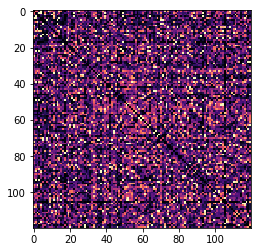

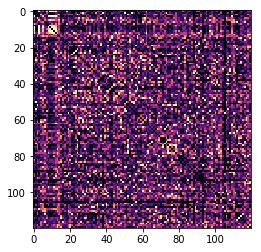

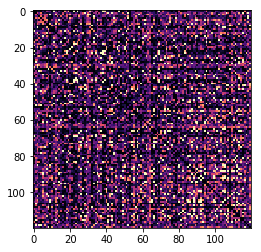

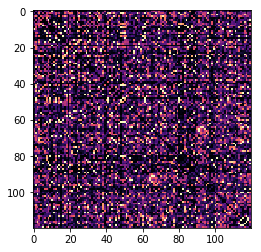

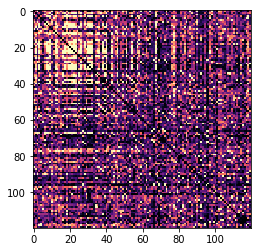

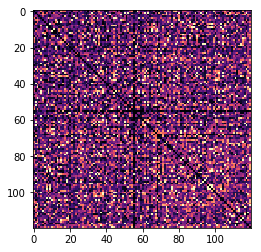

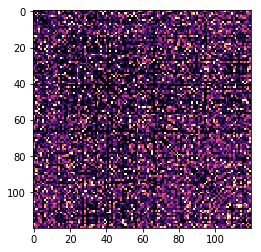

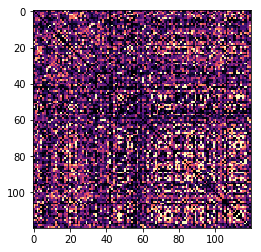

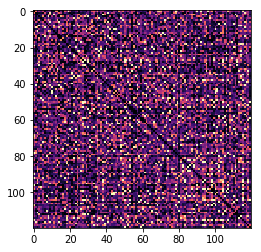

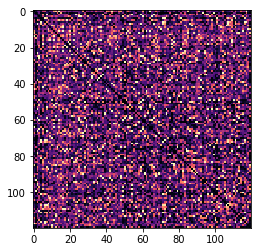

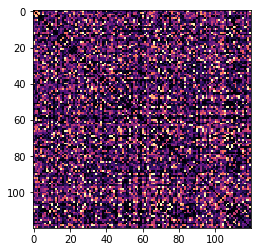

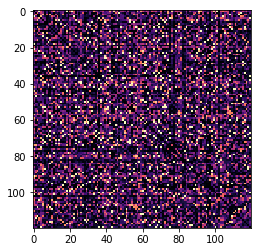

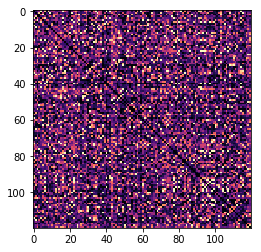

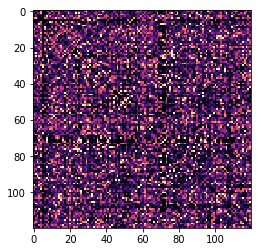

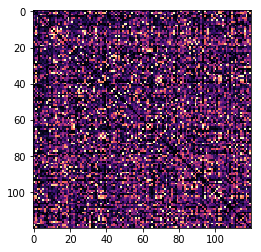

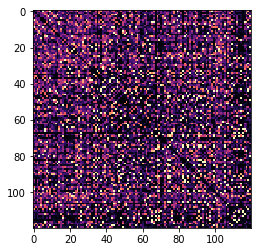

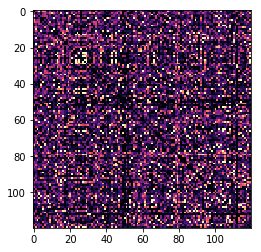

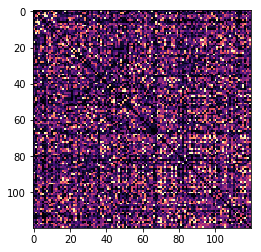

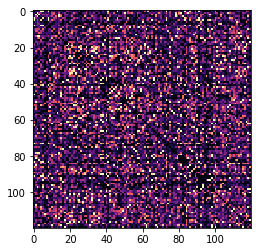

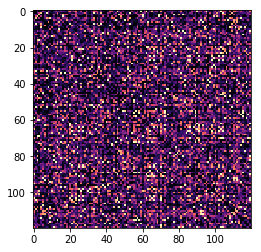

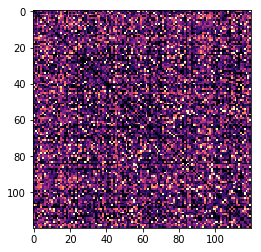

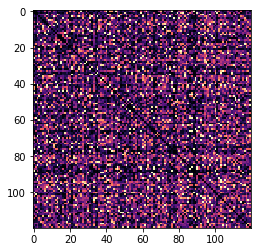

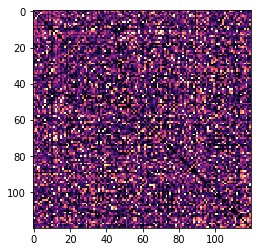

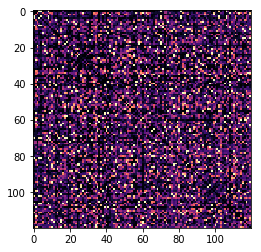

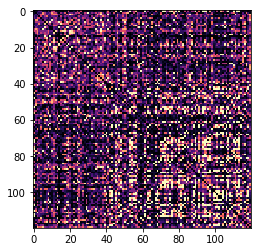

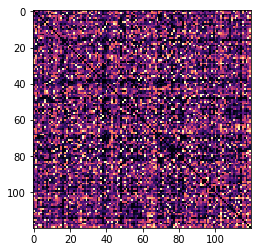

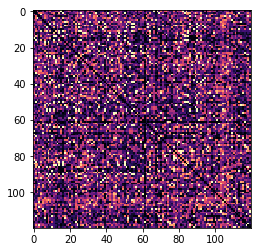

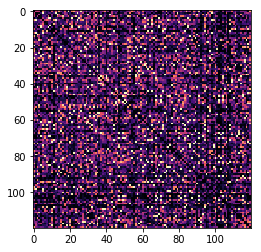

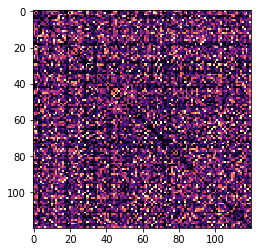

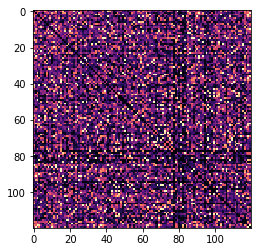

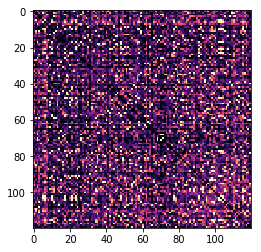

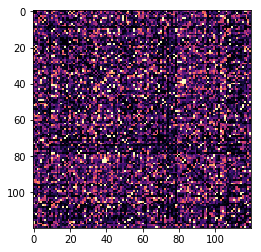

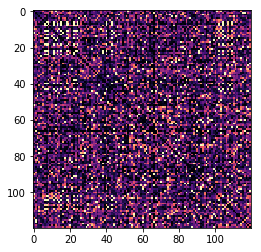

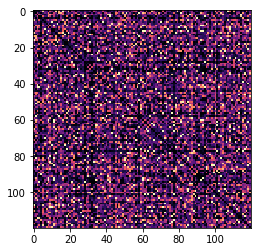

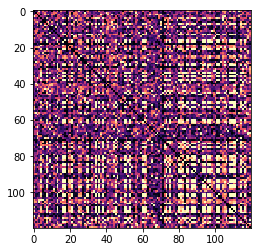

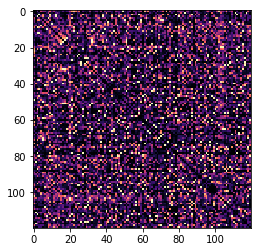

In [242]:
for cell in range(0,ss_sim.shape[0],50):
    f,ax = plt.subplots()
    _ss = ss_sim[cell,:,:]
#     _ss= _ss[msort,:]
#     _ss = _ss[:,msort]
    _ss[np.diag_indices(_ss.shape[0])]=0
    ax.imshow(_ss,cmap='magma',vmin=0,vmax=.5)

In [685]:
f,ax = plt.subplots()
ss_tmp = ss_sim.mean(axis=0)
ss_tmp[np.diag_indices_from(ss_tmp)]=np.nan
ax.imshow(np.log(ss_tmp),cmap='magma')

In [622]:
centroids ,l = u.across_trial_avg(S_trial_mat,trial_info['morphs'])
print(l)
centroids_norm = centroids/np.linalg.norm(centroids,ord=2,axis=1)[:,np.newaxis,:]
centroid0,centroid1 = centroids_norm[0,:,:],centroids_norm[-1,:,:]
centroid0,centroid1 = centroid0[np.newaxis,:,:],centroid1[np.newaxis,:,:]

sim0 = np.matmul(np.transpose(S_tm_norm,axes=(2,0,1)),np.transpose(centroid0,axes=(2,1,0)))
sim1 = np.matmul(np.transpose(S_tm_norm,axes=(2,0,1)),np.transpose(centroid1,axes=(2,1,0)))

lar = np.squeeze(np.log(sim0)-np.log(sim1))

print(lar.shape)

[0.   0.25 0.5  0.75 1.  ]
(1631, 120)


(1631, 10)
(10, 120)


(array([ 59., 525., 459., 205., 131.,  76.,  55.,  37.,  27.,  20.,  15.,
          7.,   3.,   3.,   5.,   0.,   0.,   0.,   0.]),
 array([-3.        , -2.05263158, -1.10526316, -0.15789474,  0.78947368,
         1.73684211,  2.68421053,  3.63157895,  4.57894737,  5.52631579,
         6.47368421,  7.42105263,  8.36842105,  9.31578947, 10.26315789,
        11.21052632, 12.15789474, 13.10526316, 14.05263158, 15.        ]),
 <a list of 19 Patch objects>)

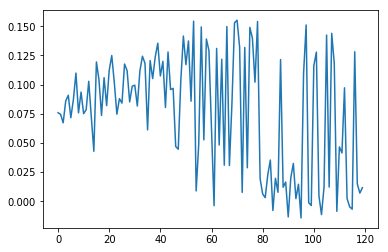

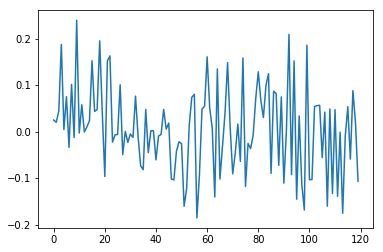

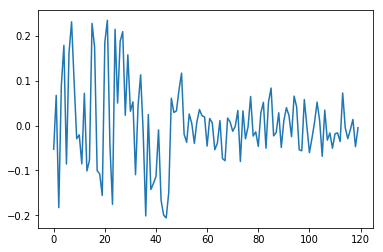

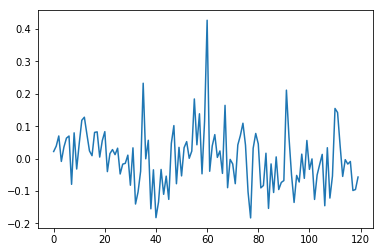

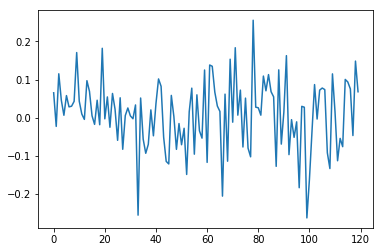

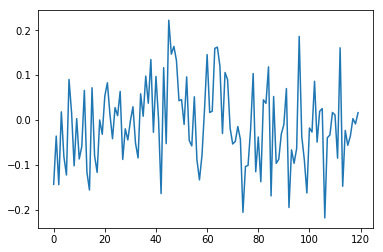

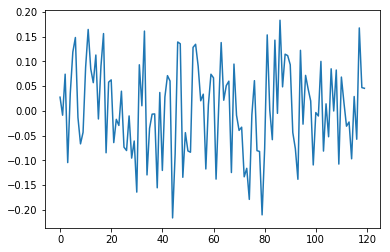

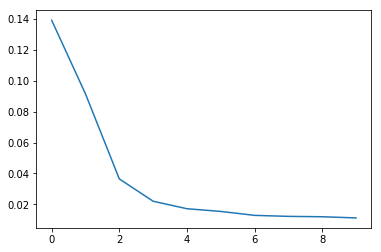

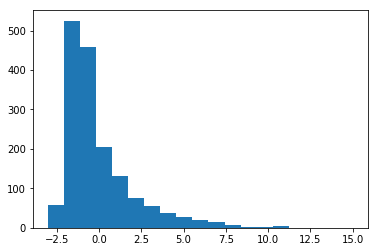

In [626]:
pca = sk.decomposition.PCA(n_components=10)
w_ = pca.fit_transform(lar)
print(w_.shape)



f,ax = plt.subplots()
ax.scatter(w_[:,0],w_[:,1])


H = pca.components_
print(H.shape)
for j in range(w_.shape[1]):
    f,ax = plt.subplots()
    ax.plot(H[j,:])
    
f,ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_[:10])

f,ax = plt.subplots()
ax.hist(w_[:,0],np.linspace(-3,15,num=20))

In [530]:
S_tm_norm = S_trial_mat/np.linalg.norm(S_trial_mat,ord=2,axis=1)[:,np.newaxis,:]
S_mat =  np.transpose(np.matmul(np.transpose(S_tm_norm,axes=(2,0,1)),np.transpose(S_tm_norm,axes=(2,1,0))),axes=(1,2,0))
S_mat_mu,l = u.across_trial_avg(S_mat,trial_info['morphs'])
S_mat_mu,l = u.across_trial_avg(np.transpose(S_mat_mu,axes=(1,0,2)),trial_info['morphs'])
print(S_mat.shape,S_mat_mu.shape)

(120, 120, 1631) (5, 5, 1631)


In [666]:
# function to return upper triangle of binned single cell similarity matrices
def binned_sim_triu(sess):
    VRDat, C, S, A = pp.load_scan_sess(sess,fneu_coeff=0.7)
    trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
    effMorph = (trial_info['morphs'] +  trial_info['wallJitter'] + trial_info['bckgndJitter'] + .3)/1.6
    msort = np.argsort(effMorph)
    
    
    S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,bin_size=10,speed=VRDat['speed']._values)
    S_tm_norm = S_trial_mat/np.linalg.norm(S_trial_mat,ord=2,axis=1)[:,np.newaxis,:]
    S_mat =  np.transpose(np.matmul(np.transpose(S_tm_norm,axes=(2,0,1)),np.transpose(S_tm_norm,axes=(2,1,0))),axes=(1,2,0))
    S_mat[np.isnan(S_mat)]=0
    S_mat/=S_mat.ravel().mean()
    print(S_mat.shape)
    
#     mu_sim,l = u.across_trial_avg(S_mat,trial_info['morphs'])
    mu_sim = u.morph_pos_rate_map(S_mat,effMorph)
#     mu_sim,l = u.across_trial_avg(np.transpose(mu_sim,axes=(1,0,2)),trial_info['morphs'])
    mu_sim = u.morph_pos_rate_map(np.transpose(mu_sim,axes=(1,0,2)),effMorph)
    mu_sim = np.transpose(mu_sim,axes=(2,0,1))
    
    
    
#     S_mean_mat,l = u.across_trial_avg(S_trial_mat,trial_info['morphs'])

#     S_mean_mat[np.isnan(S_mean_mat)]=0.
#     S_mean_mat_norm = S_mean_mat/np.linalg.norm(S_mean_mat,ord=2,axis=1)[:,np.newaxis,:]
    
#     mu_sim = np.matmul(np.transpose(S_mean_mat_norm,axes=(2,0,1)),np.transpose(S_mean_mat_norm,axes=(2,1,0)))
    
    ui = np.triu_indices(mu_sim.shape[1],k=1)
    return mu_sim[:,ui[0],ui[1]]



# function to stack all single cell vectors
def build_matrix(mouse_list,first_sess=5):
    
    
    for m, mouse in enumerate(mouse_list):    
        print(mouse)
        df_mouse = df[df['MouseName'].str.match(mouse)]
        for i, sess_ind in enumerate(range(first_sess,df_mouse.shape[0])):
            vec = binned_sim_triu(df_mouse.iloc[sess_ind])
            if (m==0) and (i==0):
                cellmat = vec
            else:
                cellmat = np.concatenate((cellmat,vec),axis=0)
        
    return cellmat

V_rare = build_matrix(['4139265.5','4139265.4','4139265.3'])
V_fam = build_matrix(['4222153.2','4222153.1','4222153.3','4222174.1'],first_sess=4)
    
    



4139265.5
num aberrant ttls 0.0
34737 (34737,) (34737, 21) 113863


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
(120, 120, 915)
num aberrant ttls 0.0
36018 (36018,) (36018, 21) 118606
frame diff 0
(120, 120, 976)
num aberrant ttls 0.0
40272 (40272,) (40272, 21) 133982
frame diff 0
(120, 120, 984)
num aberrant ttls 0.0
36659 (36659,) (36659, 21) 120387
frame diff 0
(120, 120, 932)
num aberrant ttls 0.0
36583 (36583,) (36583, 21) 124384
frame diff 0
(120, 120, 1047)
4139265.4
num aberrant ttls 0.0
30897 (30897,) (30897, 21) 102093
frame diff 0
(120, 120, 1632)
num aberrant ttls 0.0
29023 (29023,) (29023, 21) 95160
frame diff 0
(120, 120, 1656)
num aberrant ttls 0.0
31116 (31116,) (31116, 21) 102131
frame diff 0


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


(120, 120, 1515)
num aberrant ttls 0.0
31932 (31932,) (31932, 21) 105228
frame diff 0
(120, 120, 1650)
num aberrant ttls 0.0
30493 (30493,) (30493, 21) 100982
frame diff 0
(120, 120, 1498)
num aberrant ttls 0.0
32084 (32084,) (32084, 21) 105601
frame diff 0
(120, 120, 1631)
4139265.3
num aberrant ttls 0.0
35085 (35085,) (35085, 21) 115307
frame diff 0
(120, 120, 1828)
num aberrant ttls 0.0
33140 (33140,) (33140, 21) 109003
frame diff 0
(120, 120, 1904)
num aberrant ttls 0.0
38209 (38209,) (38209, 21) 126969
frame diff 0
(120, 120, 1817)
num aberrant ttls 0.0
33547 (33547,) (33547, 21) 110218
frame diff 0
(120, 120, 1708)
num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
frame diff 0
(120, 120, 1715)
4222153.2
num aberrant ttls 0.0
35248 (35248,) (35248, 21) 116195
frame diff 0
(120, 120, 2127)
num aberrant ttls 0.0
33545 (33545,) (33545, 21) 121243
frame diff 0
(120, 120, 2149)
num aberrant ttls 0.0
38697 (38697,) (38697, 21) 129389
frame diff 0
(100, 100, 2046)
num aberrant ttls

In [667]:
print(V_rare.shape,V_fam.shape)

(23408, 45) (19271, 45)


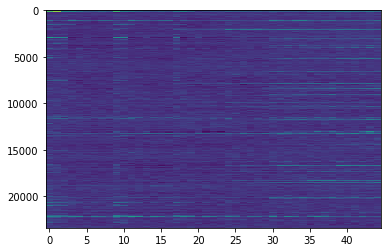

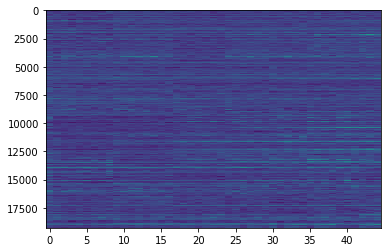

In [668]:
f,ax = plt.subplots()
ax.imshow(V_rare,aspect='auto')
f,ax = plt.subplots()
ax.imshow(V_fam,aspect='auto')

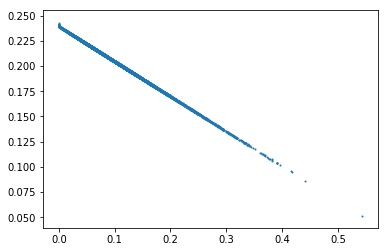

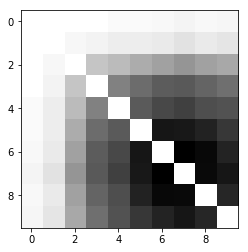

In [684]:
nc = 2
nf = 10
pca = sk.decomposition.NMF(n_components=nc)
V_ = V_fam
V_/=V_.mean(axis=1)[:,np.newaxis]
ui = np.triu_indices(nf,k=1)
half = np.zeros([V_.shape[0],])
half[np.random.permutation(V_.shape[0])[:int(V_.shape[0]/2)]]=1
V_tr = V_[:,:]
ss_ = pca.fit_transform(V_tr)

ss__ = np.matmul(V_[:,:],pca.components_.T)

f,ax = plt.subplots()
ax.scatter(ss_[:,1],ss_[:,0],s=1)


H = np.zeros([nc,nf,nf])

H[:,ui[0],ui[1]] = pca.components_#.reshape([nc,ss_sim.shape[-1],ss_sim.shape[-1]])
H += np.transpose(H,axes=(0,2,1))
for j in range(ss_.shape[1]):
    f,ax = plt.subplots()
    _H = H[j,:,:]
    
    _H[np.diag_indices_from(_H)]=np.nan
    ax.imshow(_H,cmap='Greys')

    
    


In [670]:
# inspect by hand to ensure normalization isn't necessary

In [671]:
# run NMF on whole matrix
import ensemble as nmf

In [675]:
results = nmf.fit_ensemble(V_,np.arange(1,10),n_replicates=5)


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:26<00:00,  4.76s/it]

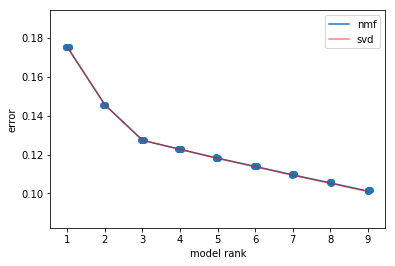

In [676]:
import plots 
ax = plots.plot_rmse(results)
# ax.set_ylim([.148,.153])